In [8]:
import os
import numpy as np
import pandas as pd
from time import time
from utils import dependencies, aspect_tools

data_dir = "/home/stavros/DATA/AirbnbReviews"
#data_dir = "D:/"

In [9]:
area = "athens"
area_dir = os.path.join(data_dir, area)
listings = pd.read_csv(os.path.join(area_dir, "listings.csv.gz"))

for column in listings.columns: print(column)

/home/stavros/PythonEvironments/nlp-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
reviews = pd.read_pickle(os.path.join(area_dir, "reviews_with_aspects_379118samples.pkl"))
print(reviews.shape)
reviews = reviews[pd.notnull(reviews["processed_comments"])]
print(reviews.shape)

(379118, 8)
(294403, 8)


In [11]:
import re
def remove_special_characters(review):
    # Substitute all special characters with spaces
    text = re.sub("[^a-zA-z\s]", " ", review)
    # Substitute any white space character with a single space
    text = " ".join(text.split())
    return text.lower()

In [39]:
listings = listings[pd.notnull(listings["neighbourhood"])]
ids2neighborhood = {k: v for k, v in zip(listings["id"], listings["neighbourhood"])}

reviews["neighborhood"] = reviews["listing_id"].map(lambda x: ids2neighborhood[x] if x in ids2neighborhood else None)
print(reviews.shape)

reviews = reviews[pd.notnull(reviews["neighborhood"])]
print(reviews.shape)

(294403, 9)
(294401, 9)


In [40]:
from sklearn import feature_extraction
import nltk

stopwords = nltk.corpus.stopwords.words("english")

In [41]:
tfidf = feature_extraction.text.TfidfVectorizer(stop_words=stopwords)
proc_comments = reviews.processed_comments.map(remove_special_characters)
tdf_mat = tfidf.fit_transform(proc_comments)
tdf_mat

<294401x52807 sparse matrix of type '<class 'numpy.float64'>'
	with 7227274 stored elements in Compressed Sparse Row format>

In [42]:
import collections
word_scores = tdf_mat.mean(axis=0)
word_scores = collections.Counter({w: word_scores[0, ind] for w, ind in tfidf.vocabulary_.items()})
len(word_scores)

52807

In [47]:
unique_ngh = np.unique(reviews["neighborhood"])
ngh_word_scores = [tdf_mat[np.where(reviews["neighborhood"] == n)[0]].mean(axis=0) for n in unique_ngh]

In [53]:
len(unique_ngh)

32

In [50]:
ngh_word_scores = [collections.Counter({w: score[0, ind] for w, ind in tfidf.vocabulary_.items()})
                   for score in ngh_word_scores]

In [51]:
ngh_word_matrix = np.concatenate([tdf_mat[np.where(reviews["neighborhood"] == n)[0]].mean(axis=0) for n in unique_ngh], axis=0)

In [52]:
ngh_word_matrix.shape

(32, 52807)

In [54]:
import matplotlib.pyplot as plt

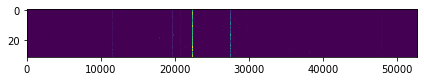

In [60]:
plt.figure(figsize=(7, 4))
plt.imshow(ngh_word_matrix, aspect=200)
plt.show()

In [68]:
ngh_word_matrix_trunc = np.array([word for word in ngh_word_matrix.T if not (word < 1e-2).prod()]).T
print(ngh_word_matrix_trunc.shape)

(32, 1, 261)


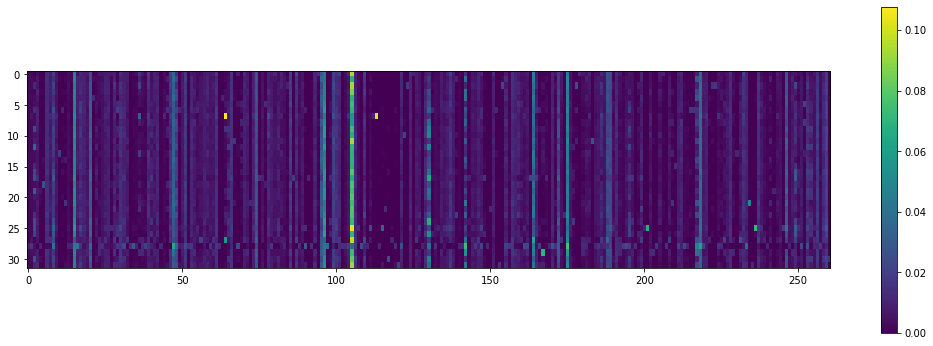

In [75]:
plt.figure(figsize=(18, 6))
plt.imshow(ngh_word_matrix_trunc[:, 0], aspect=2)
plt.colorbar()
plt.show()